In [1]:
from matplotlib import pyplot as plt
from IPython.display import display
import cv2
import numpy as np

ModuleNotFoundError: No module named 'cv2'

number found!
number end
1
83
81
272
399
number found!
number end
2
375
213
590
225
number found!
number end
3
707
65
958
369


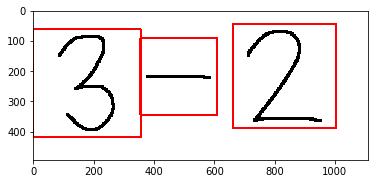

In [17]:
max_lowThreshold = 100
window_name = 'Edge Map'
title_trackbar = 'Min Threshold:'
ratio = 3
kernel_size = 3

val = 100

img = cv2.imread('Eq_minus2.png')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

low_threshold = val
detected_edges = cv2.Canny(gray, low_threshold, low_threshold*ratio, kernel_size)
mask = detected_edges != 0
dst = img * (mask[:,:,None].astype(img.dtype))

is_a_number = 0
is_in_middle = 0

top_r = 10000
bot_r = 0
prev_c = 0

height = img.shape[0]
width = img.shape[1]

padding_r = 0
padding_c = 0
sign = 'plus'

symbol = 0

np.savetxt('text.txt',detected_edges,fmt='%.2f')


for column in range(0, width):
    is_in_middle = 0
    for row in range(0, height):
        if (detected_edges[row, column] > 30):
            is_in_middle = 1
            if row > bot_r:
                bot_r = row
            if row < top_r:
                top_r = row
            

    if (is_in_middle == 1 and is_a_number == 0):
        print("number found!")
        is_a_number = 1       
        prev_c = column
        
    if is_in_middle == 0 and is_a_number == 1:
        print("number end")
        if (column - prev_c > bot_r - top_r):
            padding_r = (int) (((column - prev_c) - (bot_r - top_r)) / 2)
        else:
            padding_c = (int) (((bot_r - top_r) - (column - prev_c)) / 2)
        
        padding_c += 20
        padding_r += 20
        symbol += 1
        img = cv2.rectangle(img,(prev_c - padding_c, top_r - padding_r),(column + padding_c, bot_r + padding_r),(255,0,0),5)
        is_a_number = 0
    
        print(symbol)
        print(prev_c)
        print(top_r)
        print(column)
        print(bot_r)
        
        # save boundaries for +/- Classification 
        if(symbol == 2):
            leftC = prev_c
            rightC = column
            bottomR = bot_r
            topR = top_r
            
            # +/- DETECTION USING CANNY EDGES 
            colDim = rightC - leftC
            rowDim = topR - bottomR

            ratio = abs(colDim) /abs(rowDim) 
            if (ratio > 2.5):
                sign = 'minus'
        
        top_r, bot_r, padding_c, padding_r = 10000, 0, 0, 0
        
            
plt.imshow(img)
plt.show()

In [18]:
# +/- DETECTION USING CANNY EDGES 
colDim = rightC - leftC
rowDim = topR - bottomR

ratio = abs(colDim) /abs(rowDim) 
label = 'plus'
if (ratio > 2.5):
    label = 'minus'
print(label)

minus
